# Performing Time Series Analysis using FbProphet  

In [1]:
import numpy as np
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/covid19dataupdated-on-16022021/owid-covid-data.csv


In [2]:
!pip install pystan

In [3]:
! pip install fbprophet

In [4]:
data=pd.read_csv('/kaggle/input/covid19dataupdated-on-16022021/owid-covid-data.csv')

In [5]:
data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [6]:
data.shape

(69175, 59)

In [7]:
data.isna().sum()

iso_code                                     0
continent                                 3454
location                                     0
date                                         0
total_cases                                829
new_cases                                  831
new_cases_smoothed                        1832
total_deaths                              9765
new_deaths                                9607
new_deaths_smoothed                       1832
total_cases_per_million                   1204
new_cases_per_million                     1206
new_cases_smoothed_per_million            2202
total_deaths_per_million                 10127
new_deaths_per_million                    9969
new_deaths_smoothed_per_million           2202
reproduction_rate                        17880
icu_patients                             61858
icu_patients_per_million                 61858
hosp_patients                            60476
hosp_patients_per_million                60476
weekly_icu_ad

## Performing on Indian dataset

In [8]:
df_india=data[data.location=='India']

In [9]:
df=df_india.groupby(['date'])['total_cases'].sum().reset_index()

In [10]:
df.tail()

,date,total_cases
378,2021-02-11,10880603.0
379,2021-02-12,10892746.0
380,2021-02-13,10904940.0
381,2021-02-14,10916589.0
382,2021-02-15,10925710.0


In [11]:
df.isnull().sum()

date           0
total_cases    0
dtype: int64

In [12]:
df.rename(columns={'date':'Date','total_cases':'TotalCases'},inplace=True)

In [13]:
df['Date']=pd.to_datetime(df['Date'])

In [14]:
df.head()

,Date,TotalCases
0,2020-01-30,1.0
1,2020-01-31,1.0
2,2020-02-01,1.0
3,2020-02-02,2.0
4,2020-02-03,3.0


In [15]:
df.dtypes

Date          datetime64[ns]
TotalCases           float64
dtype: object

In [16]:
df_prophet=df.copy()

In [17]:
df_prophet.rename(columns={'Date':'ds','TotalCases':'y'},inplace=True)

In [18]:
df_prophet.head()

,ds,y
0,2020-01-30,1.0
1,2020-01-31,1.0
2,2020-02-01,1.0
3,2020-02-02,2.0
4,2020-02-03,3.0


In [19]:
from fbprophet import Prophet
m=Prophet()

In [20]:
model=m.fit(df_prophet)

In [21]:
m.seasonalities

OrderedDict([('weekly',
              {'period': 7,
               'fourier_order': 3,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None})])

In [22]:
future=model.make_future_dataframe(periods=30,freq='D')

In [23]:
future.tail()

,ds
408,2021-03-13
409,2021-03-14
410,2021-03-15
411,2021-03-16
412,2021-03-17


In [24]:
df_prophet['ds'].tail()

378   2021-02-11
379   2021-02-12
380   2021-02-13
381   2021-02-14
382   2021-02-15
Name: ds, dtype: datetime64[ns]

In [25]:
prediction=model.predict(future)

In [26]:
prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-30,-9.362429e+02,-4.598673e+04,4.100298e+04,-9.362429e+02,-9.362429e+02,288.856384,288.856384,288.856384,288.856384,288.856384,288.856384,0.0,0.0,0.0,-6.473866e+02
1,2020-01-31,-9.145228e+02,-4.939356e+04,4.570903e+04,-9.145228e+02,-9.145228e+02,906.177016,906.177016,906.177016,906.177016,906.177016,906.177016,0.0,0.0,0.0,-8.345780e+00
2,2020-02-01,-8.928026e+02,-4.882946e+04,4.599154e+04,-8.928026e+02,-8.928026e+02,2195.851146,2195.851146,2195.851146,2195.851146,2195.851146,2195.851146,0.0,0.0,0.0,1.303049e+03
3,2020-02-02,-8.710825e+02,-4.483153e+04,4.549933e+04,-8.710825e+02,-8.710825e+02,1533.663191,1533.663191,1533.663191,1533.663191,1533.663191,1533.663191,0.0,0.0,0.0,6.625807e+02
4,2020-02-03,-8.493623e+02,-5.042291e+04,4.211195e+04,-8.493623e+02,-8.493623e+02,-3230.413228,-3230.413228,-3230.413228,-3230.413228,-3230.413228,-3230.413228,0.0,0.0,0.0,-4.079776e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,2021-03-13,1.154656e+07,1.132463e+07,1.175472e+07,1.132718e+07,1.174946e+07,2195.851146,2195.851146,2195.851146,2195.851146,2195.851146,2195.851146,0.0,0.0,0.0,1.154876e+07
409,2021-03-14,1.156529e+07,1.132692e+07,1.180289e+07,1.133174e+07,1.178017e+07,1533.663191,1533.663191,1533.663191,1533.663191,1533.663191,1533.663191,0.0,0.0,0.0,1.156682e+07
410,2021-03-15,1.158401e+07,1.133252e+07,1.181627e+07,1.133651e+07,1.181319e+07,-3230.413228,-3230.413228,-3230.413228,-3230.413228,-3230.413228,-3230.413228,0.0,0.0,0.0,1.158078e+07
411,2021-03-16,1.160274e+07,1.133317e+07,1.184594e+07,1.134110e+07,1.184771e+07,-1545.630334,-1545.630334,-1545.630334,-1545.630334,-1545.630334,-1545.630334,0.0,0.0,0.0,1.160119e+07


## Visualising Predicitions

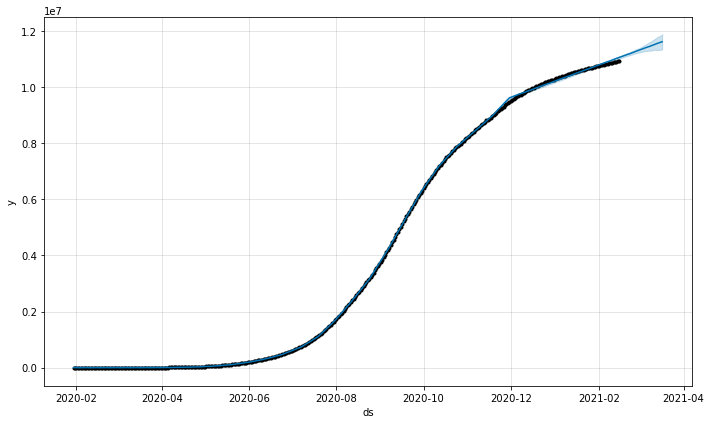

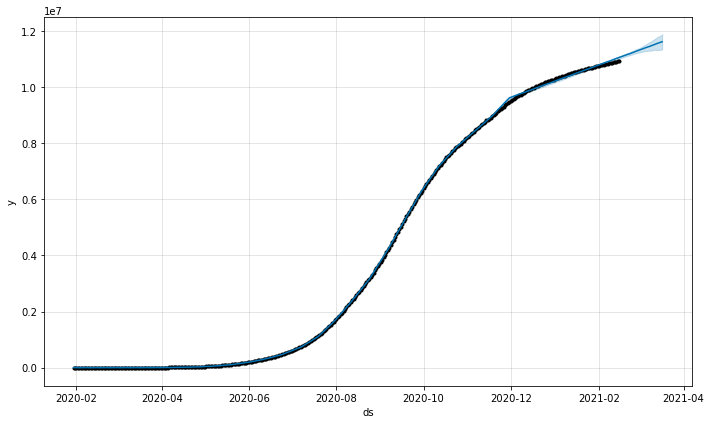

In [27]:
model.plot(prediction)

## Visualising Components

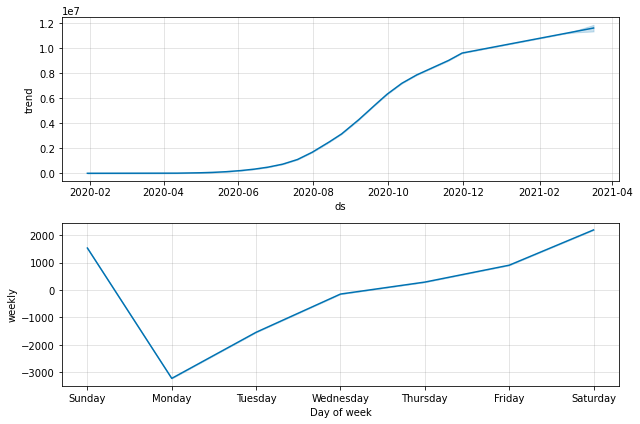

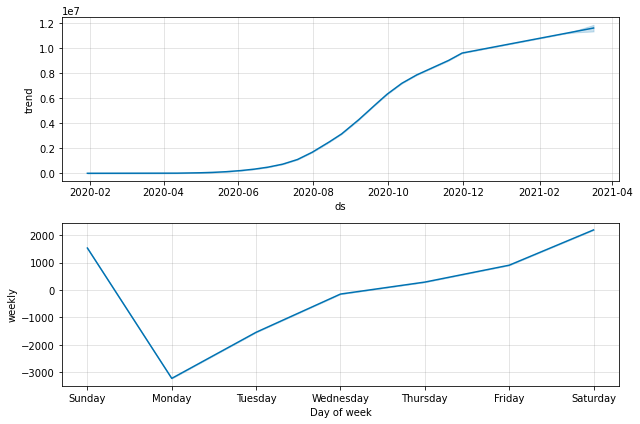

In [28]:
model.plot_components(prediction)

## Doing CrossValidation

In [29]:
from fbprophet.diagnostics import cross_validation
df_cv=cross_validation(model,horizon='30 days',period='15 days',initial='90 days')

  0%|          | 0/18 [00:00<?, ?it/s]

In [30]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-05-07,49281.623047,48072.994098,50537.726632,56351.0,2020-05-06
1,2020-05-08,51002.316522,49831.665304,52132.750268,59695.0,2020-05-06
2,2020-05-09,52811.261540,51614.715867,53942.259672,62808.0,2020-05-06
3,2020-05-10,54659.759434,53450.952127,55845.521177,67161.0,2020-05-06
4,2020-05-11,56608.539649,55431.479000,57843.332677,70768.0,2020-05-06


## Visualising changepoints in the model

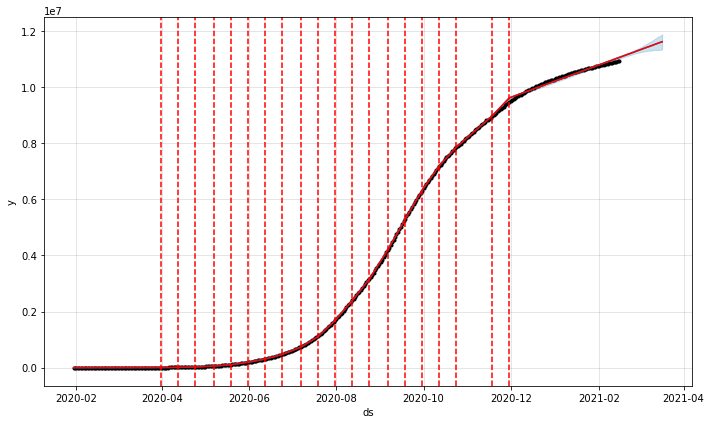

In [31]:
from fbprophet.plot import add_changepoints_to_plot
fig=model.plot(prediction)
a=add_changepoints_to_plot(fig.gca(),model,prediction)

In [32]:
from fbprophet.diagnostics import performance_metrics
df_perf=performance_metrics(df_cv)
df_perf.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,3 days,4.026224e+10,200654.529684,166044.214737,0.061034,0.047009,0.055556
1,4 days,4.689592e+10,216554.658223,180194.295810,0.067525,0.051387,0.055556
2,5 days,5.420312e+10,232815.640199,195014.194316,0.073681,0.054049,0.055556
3,6 days,6.227231e+10,249544.194737,210505.343122,0.079829,0.057156,0.055556
4,7 days,7.187012e+10,268086.030781,227653.744897,0.085939,0.061264,0.055556


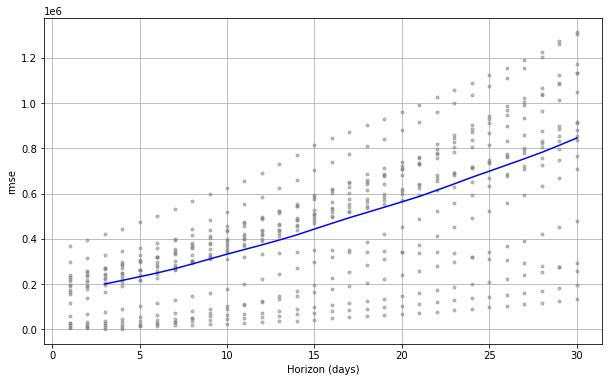

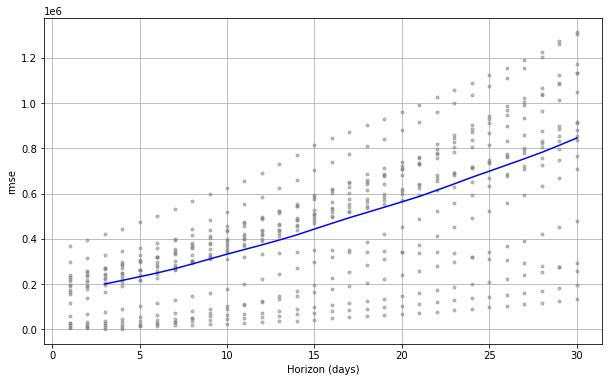

In [33]:
from fbprophet.plot import plot_cross_validation_metric
plot_cross_validation_metric(df_cv,metric='rmse')